# RK Model 
- The model is an attempt to understand the influence of physical processes in cold regions. A 2-D transect along the Yakou catchement (Tibetan Plateau, Heihe river basin) is the field site.   
- The notebook describes the model configurations, prepares the dataset (if required), extracts the output and plots it. 

### Brief description:

**Goal – To test the sensitivity of Van Genuchten parameters to the subsurface temperature and subsurface moisture data considering air temperature as the top boundary condition (Scenario IV). The sensitivity analysis with and without precipitation influence (snow and rain) can be tested. The VGc parameters (alpha, n, wr) for Peat, Mineral and Bedrock is varied [three to five simulations each]**

- T : 1 year (365 days) - Daily time steps 
- Processes: Subsurface permafrost - flow, energy
- Mesh: Pseudo 1-D column with three layers - organic, mineral, and bedrock layer with increasing cell sizes.
- Initial conditions : -1.0 m – hydrostatic head (in m) to represent the permafrost table level or active layer, 264.15 K (-3°C).
- Boundary conditions :  Top - **Actual daily air temprature (2017) **
- Note that the VGc properties of bedrock are less significant since they are mostly saturated.

- Parameters:
    - VGc - Peat: alpha – [1 - 0.0005, 2 - 0.001, 3 - 0.01, 4 - 0.02, 5 - 0.05], n – [1 - 1.05, 2 - 1.2, 3 - 1.4, 4 - 1.6, 5 - 2], wr = [1 - 0.05, 2 - 0.1, 3 - 0.12, 4 - 0.15, 5 - 0.2]
    - VGc - Mineral: alpha – [1 -2E-05, 2 - 2E-04, 3 - 2E-03, 4 - 0.007, 5 - 0.01], n – [1 - 1.05, 2 - 1.2, 3 - 1.4, 4 - 1.6, 5 - 2], wr = [1 - 0.05, 2 - 0.1, 3 - 0.12, 4 - 0.15, 5 - 0.2]
    - VGc - Bedrock: alpha – [1 - 0.001, 2 - 0.05,  3 - 0.1], n – [1 - 1.05, 2 - 1.5, 3 - 2, 4 - 2.5, 5 - 3], wr = [1 - 0.01, 2 - 0.05, 3 - 0.1]
    - Thermal conductivity: Peat – L_dry – 0.07 W m^-1 K^-1, alpha_frozen = 1.0, alpha_unfrozen = 0.5
    - Thermal conductivity: Mineral & Bedrock – L_dry – 0.29 W m^-1 K^-1, alpha_frozen = 1.0, alpha_unfrozen = 0.5
    - Porosity, Compressible porosity: Peat – 0.85, 1e-07 Pa^-1; Mineral – 0.5, 1e-08 Pa^-1;
    - Permeability: Peat – 5e-11 m^2, Mineral & Bedrock – 2e-13 m^2 
    - Density: Peat – 700 kg/m^3, Mineral & Bedrock – 2170 kg/m^3

**The standard VGc values (The values change based on the simulation):
    - Peat: alpha = 0.001, n = 1.4, sr = 0.1, smoothing_interval = 0.1
    - Mineral: alpha = 0.0002, n = 1.4, sr = 0.05, smoothing_interval = 0.1
    - Bedrock: alpha = 0.03, n = 2, sr = 0.05, smoothing_interval = 0.1
**

- Observations:
    - Temperature [K] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m, 20 m, 30 m, 40 m.
    - Saturation liquid [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.
    - Saturation ice [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.

- I/O files:
    - Xml file: Case1_B_IV_hyd_VGc.xml
    - Output folders (.demo file): 
        - Palpha/Case1_B_Hyd_VGc_Palpha[1-5].demo
        - Pn/Case1_B_Hyd_VGc_Pn[1-5].demo
        - Pwr/Case1_B_Hyd_VGc_Pwr[1-5].demo
        - Malpha/Case1_B_Hyd_VGc_Malpha[1-5].demo
        - Mn/Case1_B_Hyd_VGc_Mn[1-5].demo
        - Mwr/Case1_B_Hyd_VGc_Mwr[1-5].demo
        - Balpha/Case1_B_Hyd_VGc_Balpha[1-5].demo
        - Bn/Case1_B_Hyd_VGc_Bn[1-5].demo
        - Bwr/Case1_B_Hyd_VGc_Bwr[1-5].demo

- Expected results: Since we are not considering the precipitation input at the top, we might not observe significant changes with respect to the VGc properties. However, during the thawing season there is a release of water due to which the change in the parameters might significantly affect the results in the upper layers [Peat and mineral layer]. The changes might be as follows:
    - alpha : As alpha value increases, the capillary fringe activity decreases [as alpha increases it moves from clay to sand] --> the soil water withholding capacity reduces --> hence there is greater moisture flow (might be observed in subsurface moisture data) --> as moisture increases, the temperature might also increase [What about s_i ? --> Claypeyron equation]. **alpha ↑ --> s_l ↓ (hard to say) --> T ↓**
    - n : n value defines the soil degradation. As n value increases, the soil moves from loam [mixture of sand, clay, and silt] to single sized particles [just clay, sand or silt]. As 'n' value increases, soil moisture flow becomes easier [as capillary pressure reduces]. With the increase in 'n', probably the saturation of liquid decreases at a faster rate. Probably  the temperature might also decrease. **n ↑ --> s_l ↓ (hard to say) --> T ↓**  
    - wr : wr defines the amount of water that is retained in the soil. **wr ↑ --> s_l ↑ (hard to say) --> T ↑**
    
### Detailed description:

#### 1. Physical processes - Cases: Case 1
The physical processes that are considered - Subsurface flow + Subsurface energy (with ice content). A custom strong coupler - 'subsurface permafrost' couples the 'permafrost flow' and 'three-phase energy' PKs. 

<img src='../figures/Case1_process.jpg' width='500' height='500' alt='Case1 physical process' align='center' />  




#### 2. Mesh - Stages: Stage B
Two types of meshes are considered here. The first mesh (Yakou_column.exo) resembles the properties of the hillslope transect that we would like to simulate. Once the meshing issues are resolved, we will be using this mesh. The second mesh is a test mesh that was generated by the ATS developers with similar properties. We will be using this mesh. 

1. Yakou_column.exo - Organic layer (0.25 m), Mineral layer (0.25 - 20 m), Bedrock (20 – 40 m) with increasing cell thickness. [Cell thickness: 0.05 m until 0.25 m (Organic layer); 0.05 m until 0.25 m and increasing cell size by 2 units until 2 m, 2 m - 20 m, we have 2 m cell sizes (Mineral layer); we again have 2 m cell sizes from 20 m - 40 m]

2. tes_org_spinup_column.exo - Organic layer (0.385 m), Mineral layer (2.24 m), Bedrock (42.48 m); Cell thickness starts with a magnitude of 0.01 m and increases in magnitude of 1.2, 1.4 & 1.5 as cell numbers increase from 20, 20 - 26, and >26. 

##### Mesh - Run it with yakou_column.xml once the meshing issues has been resolved.  

Images of 'tes_org_spinup_column.exo':

<img src='../figures/1D_test_org_spinup_column_1.PNG' width='70' height='90' alt='1D_test_org_column_1' align='left' />  

<img src='../figures/1D_test_org_spinup_column_2.PNG' width='120' height='200' alt='1D_test_org_column_2' align='center' />  




#### 3. Scenarios (IC, BC): Scenario I


| :------:               | IC   |  BC    |                 
| :----------------------------------------------------------------- | :------: | :------: |  
| Hydraulic                                                          | Hydrostatic head (-1 m) | - |
| Thermal                                                            |  270.15 K (-3 °C)   |  BCTopAiractualT = actual daily air temperature (2017) |

##### Time period (T) of 5 years (daily time step)


#### 4. Parameters:


|Sl. No.|	Parameter type|	Parameter|	Unit|	Soil type/Water	|Current value|
| --- | --- | --- | --- | --- | --- |
1 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha |	Pa^{-1} |	Peat |	0.001 |
2 |	Variably saturated properties - van Genuchten model |	van Genuchten n |	[-] | Peat |		1.4 |
3 |	Variably saturated properties - van Genuchten model |	residual saturation	| [-] | Peat |		0.1 |
4 |	Variably saturated properties - van Genuchten model |	smoothing interval width 	| [saturation] | Peat |		0.1 |
5 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha	Pa^{-1} | Mineral |	0.0002 |
6 |	Variably saturated properties - van Genuchten model |	van Genuchten n	| [-]	| Mineral |		1.4 |
7 |	Variably saturated properties - van Genuchten model |	residual saturation	| [-]	| Mineral |		0.05 |
8 |	Variably saturated properties - van Genuchten model |	smoothing interval width  |	[saturation] | Mineral |			0.1 |
9 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha	| Pa^{-1}	| Bedrock | 0.03 |
10 | Variably saturated properties - van Genuchten model |		van Genuchten n	| [-] | Bedrock | 2 |
11 | Variably saturated properties - van Genuchten model |		residual saturation	| [-]	| Bedrock | 0.05 |
12 | Variably saturated properties - van Genuchten model |		smoothing interval width 	| [saturation] | Bedrock |0.1 |
13 | 	Permafrost model parameters - fpd permafrost model [Cryosuction] |	minimum dsi_dpressure magnitude |	??	| For the entire model |	1.00E-12 |
14 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) | 	[W m^-1 K^-1] |	Peat |	0.67 |
15 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry 	| [W m^-1 K^-1] |	Peat |		0.07 |
16 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen	| [-]	 |	Peat |	1 |
17 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen	| [-]	|	Peat |	0.5 |
18 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) | 	[W m^-1 K^-1] |	Mineral |	1 |
19 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry | [W m^-1 K^-1] |	Mineral |		0.29 |
20 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen| [-] |	Mineral |		1 |
21 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen | [-] |	Mineral |		0.5 |
22 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) |	[W m^-1 K^-1] |	Bedrock |	1 |
23 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry 	| [W m^-1 K^-1] |	Bedrock |		0.29 |
24 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen	| [-]	 |	Bedrock |	1 |
25 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen	| [-] |	Bedrock |		0.5 |
39 |	Physical |	Base porosity |	[-] |	Peat |	0.85 |
40 |	Physical |	Base porosity |	[-]	 | Mineral |	0.5 |
41 |	Physical |	Base porosity | [-]	| bedrock	 | 0.5 |
42 |	Physical |	Pore compressibility	| [Pa^-1] |	Peat |	1.00E-07 |
43 |	Physical |	Pore compressibility	| [Pa^-1] |	Mineral |	1.00E-08 |
44 |	Physical |	Pore compressibility	| [Pa^-1] |	bedrock |	1.00E-08 |
45 |	Physical / Hydraulic |	Permeability	| m^2? |	Peat |	5.00E-11 |
46 |	Physical / Hydraulic |	Permeability	|m^2? |	Mineral |	2.00E-13 |
47 |	Physical / Hydraulic |	Permeability	| m^2? |	bedrock |	2.00E-13 |
48 |	Physical |	Density	| kg/m^3? |	Peat |	7.00E+02 |
49 | 	Physical |	Density	|kg/m^3? |	Mineral |	2.17E+03 |
50 |	Physical |	Density	|kg/m^3? |	bedrock |	2.17E+03 |

- The values of Bedrock are currently similar to that of Minerals. While conducting the parameter sensitivity analysis, the values will be changed.

#### 5. Visualization:

- The entire subsurface domain is visualized. 
- Cycles start period stop" - "{0,100,-1}". The unit is in days. Every 100 days, one observation instance of the entire column is dumped. T = 1825 days, therefore 20 instances are stored. 

#### 6. Observations:

- The variables under observation taken every day - {0.0,1.0,-1.0}: 

    - Temperature [K] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m, 20 m, 30 m, 40 m.
    - Saturation liquid [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.
    - Saturation ice [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.


#### I/O files:

- Dataset: Air temperature at 5 m prepared in the notebook - /home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/**AWS_final_metdata_2015_20.ipynb
- Xml file: **Case1_B_IV_hyd_VGc.xml**
- Output folders (.demo file): 
        - Palpha/Case1_B_Hyd_VGc_Palpha[1-5].demo
        - Pn/Case1_B_Hyd_VGc_Pn[1-5].demo
        - Pwr/Case1_B_Hyd_VGc_Pwr[1-5].demo
        - Malpha/Case1_B_Hyd_VGc_Malpha[1-5].demo
        - Mn/Case1_B_Hyd_VGc_Mn[1-5].demo
        - Mwr/Case1_B_Hyd_VGc_Mwr[1-5].demo
        - Balpha/Case1_B_Hyd_VGc_Balpha[1-5].demo
        - Bn/Case1_B_Hyd_VGc_Bn[1-5].demo
        - Bwr/Case1_B_Hyd_VGc_Bwr[1-5].demo

## Workflow:
1. Importing all the modules & naming the directories
2. Plotting the input data and the VGc parameters 
3. Plotting the observation results.
4. Comparing the simulation results with the measurements
5. Finding the RMSE value - yearly average and monthly average for a single group of change in parameters [Ex: Palpha[1-5]]
6. Comparison - Plotting the RMSE values yearly and monthly 
7. Determining the sensitivity index 

### 1. Importing all the modules & naming the directories

In [1]:
%matplotlib inline
import sys,os

sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
#sys.path.append(os.path.join('/home/rk/ats_rk/amanzi/src/physics/ats/tools/utils'))
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import h5py
import pandas as pd
from datetime import datetime
import matplotlib.image as mpimg

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
print(os.getcwd())

/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Hyd_VGc


In [4]:
# Output file directories:
#soil_names = ['P','M','B']

params = ['alpha','n','wr']
sim_number = [1,2,3,4,5]

# P - Peat
for j in range(len(params)):
    for k in range(len(sim_number)):
        locals()["P"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Hyd_VGc/P{params[j]}/Case1_B_IV_Hyd_VGc_P{params[j]}{sim_number[k]}.demo'
        locals()["file_observation_"+"P"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Hyd_VGc/P{params[j]}/Case1_B_IV_Hyd_VGc_P{params[j]}{sim_number[k]}.demo/observation.dat'
        locals()["file_obs_name_"+"P"+str(params[j])+str(sim_number[k])] = f'P{params[j]}/Case1_B_IV_Hyd_VGc_P{params[j]}{sim_number[k]}.dat'
        
# M - Mineral
for j in range(len(params)):
    for k in range(len(sim_number)):
        locals()["M"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Hyd_VGc/M{params[j]}/Case1_B_IV_Hyd_VGc_M{params[j]}{sim_number[k]}.demo'
        locals()["file_observation_"+"M"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Hyd_VGc/M{params[j]}/Case1_B_IV_Hyd_VGc_M{params[j]}{sim_number[k]}.demo/observation.dat'
        locals()["file_obs_name_"+"M"+str(params[j])+str(sim_number[k])] = f'M{params[j]}/Case1_B_IV_Hyd_VGc_M{params[j]}{sim_number[k]}.dat'
        
# B - Bedrock
for j in range(len(params)):
    for k in range(len(sim_number)):
        locals()["B"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Hyd_VGc/B{params[j]}/Case1_B_IV_Hyd_VGc_B{params[j]}{sim_number[k]}.demo'
        locals()["file_observation_"+"B"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Hyd_VGc/B{params[j]}/Case1_B_IV_Hyd_VGc_B{params[j]}{sim_number[k]}.demo/observation.dat'
        locals()["file_obs_name_"+"B"+str(params[j])+str(sim_number[k])] = f'B{params[j]}/Case1_B_IV_Hyd_VGc_B{params[j]}{sim_number[k]}.dat'

In [5]:
# Output directory name & input xml file name:
input_filename = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Hyd_VGc/Case1_B_IV_Hyd_VGc.xml'
# Filename measurements: (Always give the relative path and not a absolute path)
filename_measurements = '../Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/AWS_Yakou_ITP_Data_2015-20.xlsx'
input_data_file_name = 'Data/Yakou_data_2017.h5'

### 2. Plotting the input data

In [6]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'{input_data_file_name}','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    air_temp_2017_5yrs = np.array(hdf.get('air temperature [K]'))
    precip_2017_5yrs = np.array(hdf.get('precipitation rain [m s^-1]'))
    snowprecip_2017_5yrs = np.array(hdf.get('precipitation snow [m SWE s^-1]'))
    #print(air_temp_2017_5yrs)

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation snow [m SWE s^-1]', 'time [s]']




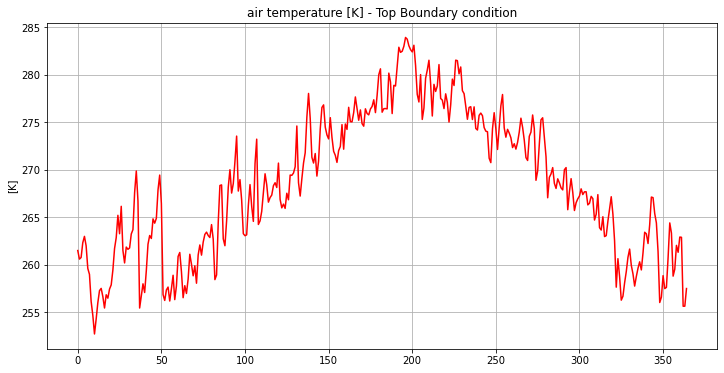

In [7]:
plt.figure(figsize=(12, 6))
plt.title('air temperature [K] - Top Boundary condition')
plt.plot(air_temp_2017_5yrs, 'r',label='air temperature [K]')
plt.ylabel('[K]')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
plt.grid(True)

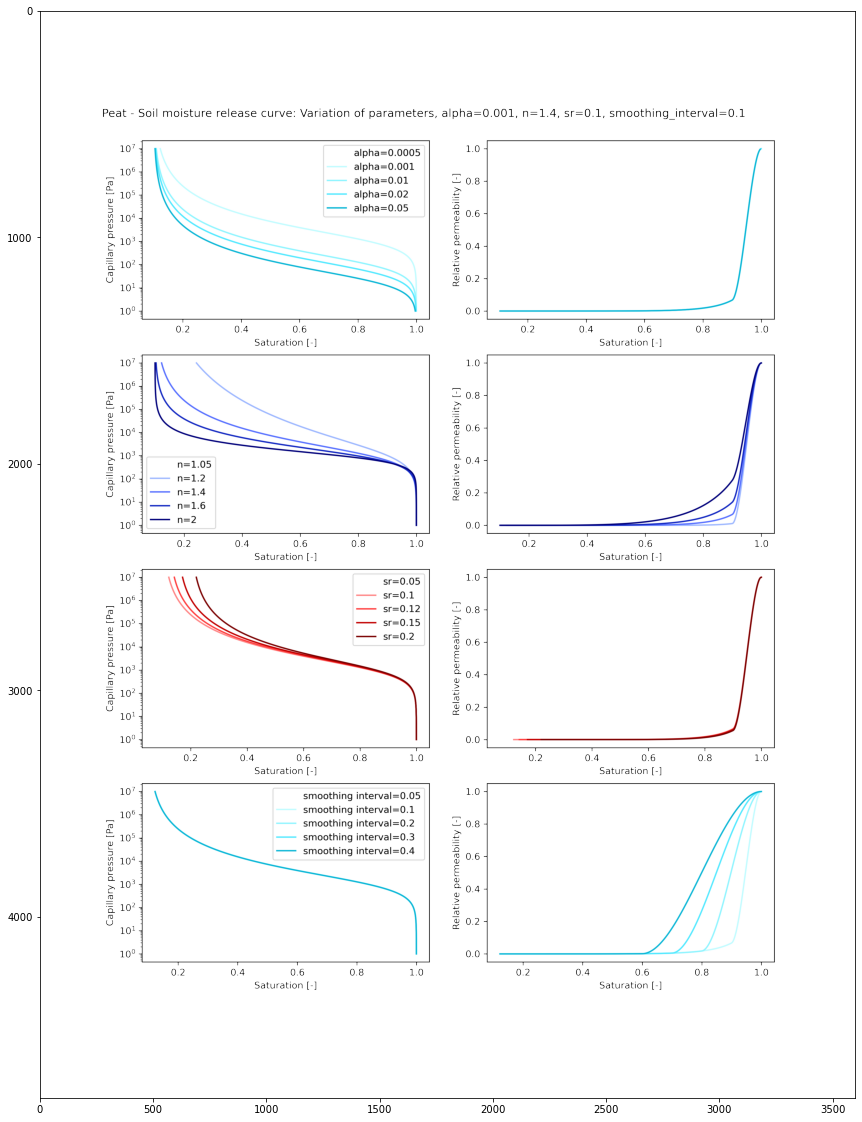

In [8]:
# Reading the VGc images
img_peat = mpimg.imread('figures/SWCC_variation_params_peat.png')
img_mineral = mpimg.imread('figures/SWCC_variation_params_mineral.png')
img_bedrock = mpimg.imread('figures/SWCC_variation_params_bedrock.png')
# Change the image files if required!
plt.figure(figsize=(20, 20))
plt.imshow(img_peat)

#### 5. Plotting the observation results:

In [9]:
# Looping over the file names:

# Removing the hash lines in the intial part of the script
# https://stackoverflow.com/questions/11968998/remove-lines-that-contain-certain-string
remove_hashs = ['#']

# Opening the observation.dat file, 
# removing the lines with a hash and storing it in a new file - observation_2.dat

# P - Peat
for j in range(len(params)):
    for k in range(len(sim_number)):
        old_file_name = locals()['file_observation_P'+f'{params[j]}{sim_number[k]}']
        new_file_name = locals()['file_obs_name_P'+ f'{params[j]}{sim_number[k]}']
        with open(f'{old_file_name}') as oldfile, open(f'{new_file_name}', 'w') as newfile:
            for line in oldfile:
                if not any(remove_hash in line for remove_hash in remove_hashs):
                    newfile.write(line)
        
# M - Mineral
for j in range(len(params)):
    for k in range(len(sim_number)):
        old_file_name = locals()['file_observation_M'+f'{params[j]}{sim_number[k]}']
        new_file_name = locals()['file_obs_name_M'+ f'{params[j]}{sim_number[k]}']
        with open(f'{old_file_name}') as oldfile, open(f'{new_file_name}', 'w') as newfile:
            for line in oldfile:
                if not any(remove_hash in line for remove_hash in remove_hashs):
                    newfile.write(line)
                    
# B - Bedrock
for j in range(len(params)):
    for k in range(len(sim_number)):
        old_file_name = locals()['file_observation_B'+f'{params[j]}{sim_number[k]}']
        new_file_name = locals()['file_obs_name_B'+ f'{params[j]}{sim_number[k]}']
        with open(f'{old_file_name}') as oldfile, open(f'{new_file_name}', 'w') as newfile:
            for line in oldfile:
                if not any(remove_hash in line for remove_hash in remove_hashs):
                    newfile.write(line)
        


*Maybe we can combine the above and below cell*

In [10]:
# Reading the csv file and adjusting the index to the required time format
# Coverting saturation to VWC [Liquid]: VWC = saturation * porosity
porosity_peat = 0.85 # Peat layer until 0.385
porosity_mineral = 0.5 # Mineral layer until 
depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

# P - Peat
for j in range(len(params)):
    for k in range(len(sim_number)):
        obs_file_name = locals()['file_obs_name_P'+ f'{params[j]}{sim_number[k]}']
        
        locals()['df_P'+ str(params[j]) + str(sim_number[k])] = pd.read_csv(f'{obs_file_name}', sep=' ')
        locals()['df_P'+ str(params[j]) + str(sim_number[k])]['time [days]'] = locals()['df_P'+ str(params[j]) + str(sim_number[k])]['time [s]']/86400
        locals()['df_P'+ str(params[j]) + str(sim_number[k])].index = locals()['df_P'+ str(params[j]) + str(sim_number[k])]['time [days]']
        for depth in depths:
            if depth < 0.385:
                locals()['df_P'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_P'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_peat*100
            else:
                locals()['df_P'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_P'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_mineral*100

# M - Mineral
for j in range(len(params)):
    for k in range(len(sim_number)):
        obs_file_name = locals()['file_obs_name_M'+ f'{params[j]}{sim_number[k]}']
        
        locals()['df_M'+ str(params[j]) + str(sim_number[k])] = pd.read_csv(f'{obs_file_name}', sep=' ')
        locals()['df_M'+ str(params[j]) + str(sim_number[k])]['time [days]'] = locals()['df_M'+ str(params[j]) + str(sim_number[k])]['time [s]']/86400
        locals()['df_M'+ str(params[j]) + str(sim_number[k])].index = locals()['df_M'+ str(params[j]) + str(sim_number[k])]['time [days]']
        for depth in depths:
            if depth < 0.385:
                locals()['df_M'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_M'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_peat*100
            else:
                locals()['df_M'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_M'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_mineral*100

# B - Bedrock
for j in range(len(params)):
    for k in range(len(sim_number)):
        obs_file_name = locals()['file_obs_name_B'+ f'{params[j]}{sim_number[k]}']
        
        locals()['df_B'+ str(params[j]) + str(sim_number[k])] = pd.read_csv(f'{obs_file_name}', sep=' ')
        locals()['df_B'+ str(params[j]) + str(sim_number[k])]['time [days]'] = locals()['df_B'+ str(params[j]) + str(sim_number[k])]['time [s]']/86400
        locals()['df_B'+ str(params[j]) + str(sim_number[k])].index = locals()['df_B'+ str(params[j]) + str(sim_number[k])]['time [days]']
        for depth in depths:
            if depth < 0.385:
                locals()['df_B'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_B'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_peat*100
            else:
                locals()['df_B'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_B'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_mineral*100

#df_observation.head()

In [11]:
df_Pn4.columns

Index(['time [s]', 'water content [mol]', 'point -0.01 temperature [K]',
       'point -0.04 temperature [K]', 'point -0.1 temperature [K]',
       'point -0.2 temperature [K]', 'point -0.4 temperature [K]',
       'point -0.8 temperature [K]', 'point -1.2 temperature [K]',
       'point -1.6 temperature [K]', 'point -5.0 temperature [K]',
       'point -10.0 temperature [K]', 'point -20.0 temperature [K]',
       'point -30.0 temperature [K]', 'point -40.0 temperature [K]',
       'point -0.01 saturation liquid', 'point -0.04 saturation liquid',
       'point -0.1 saturation liquid', 'point -0.2 saturation liquid',
       'point -0.4 saturation liquid', 'point -0.8 saturation liquid',
       'point -1.2 saturation liquid', 'point -1.6 saturation liquid',
       'point -5.0 saturation liquid', 'point -10.0 saturation liquid',
       'point -0.01 saturation ice', 'point -0.04 saturation ice',
       'point -0.1 saturation ice', 'point -0.2 saturation ice',
       'point -0.4 saturation 

In [12]:
df_Bwr1['Soil moisture at - 1.6 m (VWC %)']

time [days]
0.0      4.976629
1.0      4.975175
2.0      4.960661
3.0      4.932380
4.0      4.894024
           ...   
361.0    4.210149
362.0    4.205848
363.0    4.197961
364.0    4.187091
365.0    4.174791
Name: Soil moisture at - 1.6 m (VWC %), Length: 366, dtype: float64

#### Plotting the values - An example:
- An example:
##### 1. Subsurface temperature

In [13]:
df_observation = df_Balpha5.copy()

### Plotting temperature, saturation of liquid, and saturation of ice

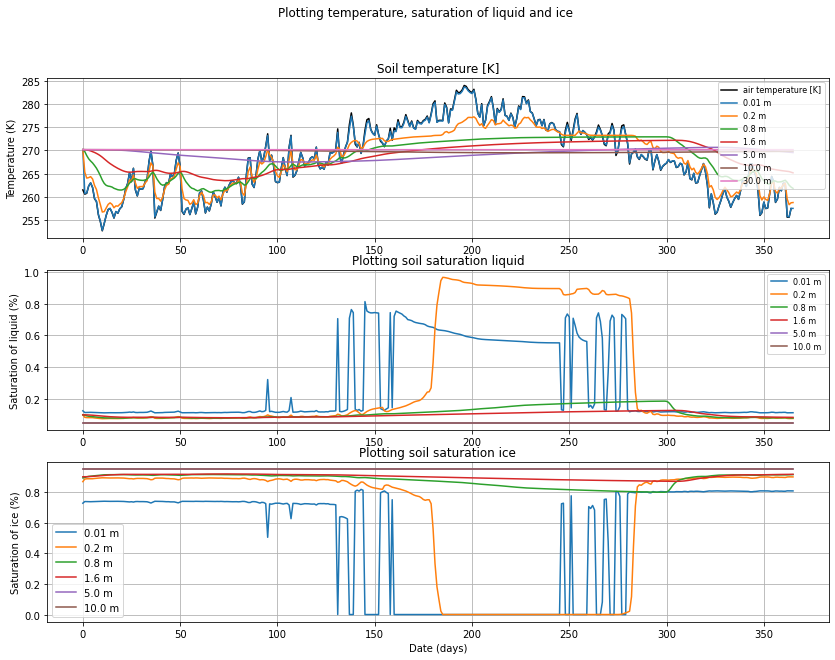

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(w=14,h=10)
fig.suptitle('Plotting temperature, saturation of liquid and ice')

ax1.set_title('Soil temperature [K]')
ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
ax1.plot(df_observation['point -0.01 temperature [K]'],label='0.01 m')
#ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
#ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
ax1.plot(df_observation['point -30.0 temperature [K]'],label='30.0 m')
#ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')
ax2.plot(df_observation['point -0.01 saturation liquid'],label='0.01 m')
#ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
#ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

##### Plotting the temperature for different alpha values at different depths

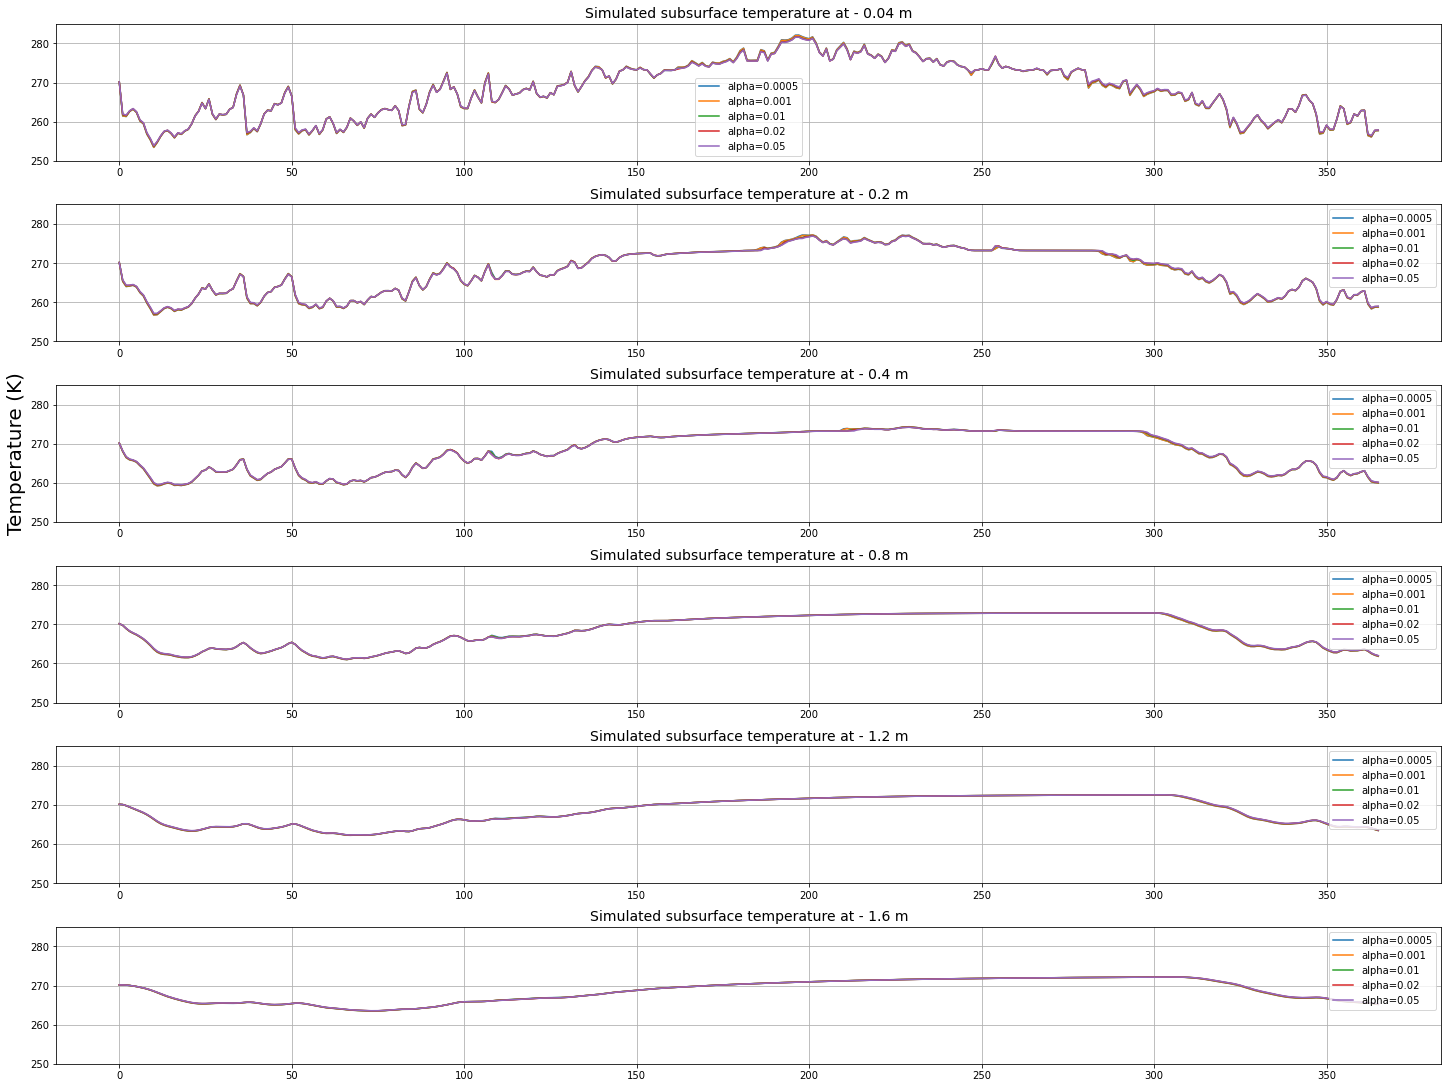

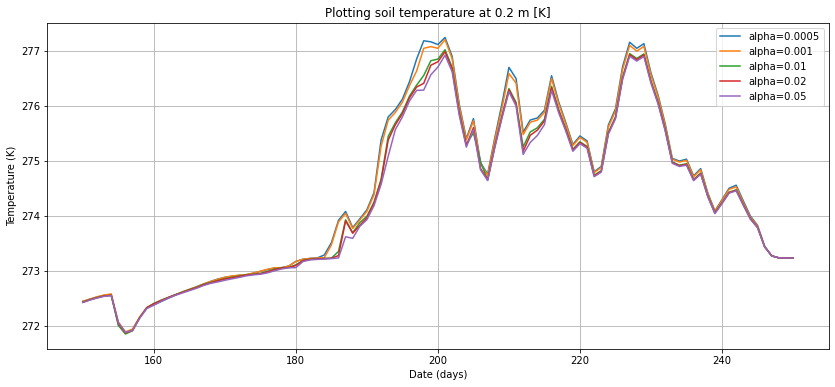

In [15]:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting soil temperature at different depths [K]')

P_alpha_values = [0.0005, 0.001, 0.01, 0.02, 0.05]

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for j, depth in enumerate(depths):
    for i, values in enumerate(P_alpha_values):
        locals()['f2_ax'+str(j+1)].plot(locals()[f"df_Palpha{i+1}"][f'point -{depth} temperature [K]'], label=f'alpha={values}')
        locals()['f2_ax'+str(j+1)]
        locals()['f2_ax'+str(j+1)].set_title(f'Simulated subsurface temperature at - {depth} m', fontsize=14)
        #f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].legend()
        locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    

f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

### Plotting the soil temperature at 0.2 m [K]

plt.figure(figsize=(14,6))
plt.title('Plotting soil temperature at 0.2 m [K]')

P_alpha_values = [0.0005, 0.001, 0.01, 0.02, 0.05]



for i, values in enumerate(P_alpha_values):
    plt.plot(locals()[f"df_Palpha{i+1}"]['point -0.2 temperature [K]'][150:250], label=f'alpha={values}')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

#### Comments:
- On first sight, the influence of alpha value variation is not prominent.
- As alpha value decreases, the temperature predicted is greater. [Yeaah! - As predicted]
- The influence of alpha for peat will be seen mostly in the peat layer i.e at 0.01, 0.2, and maybe 0.4 m. 
- A better estimate is to compare it with the measurements based on the RMSE value

##### Plotting the subsurface moisture for different alpha values at different depths

Text(0, 0.5, 'Saturation of liquid (%)')

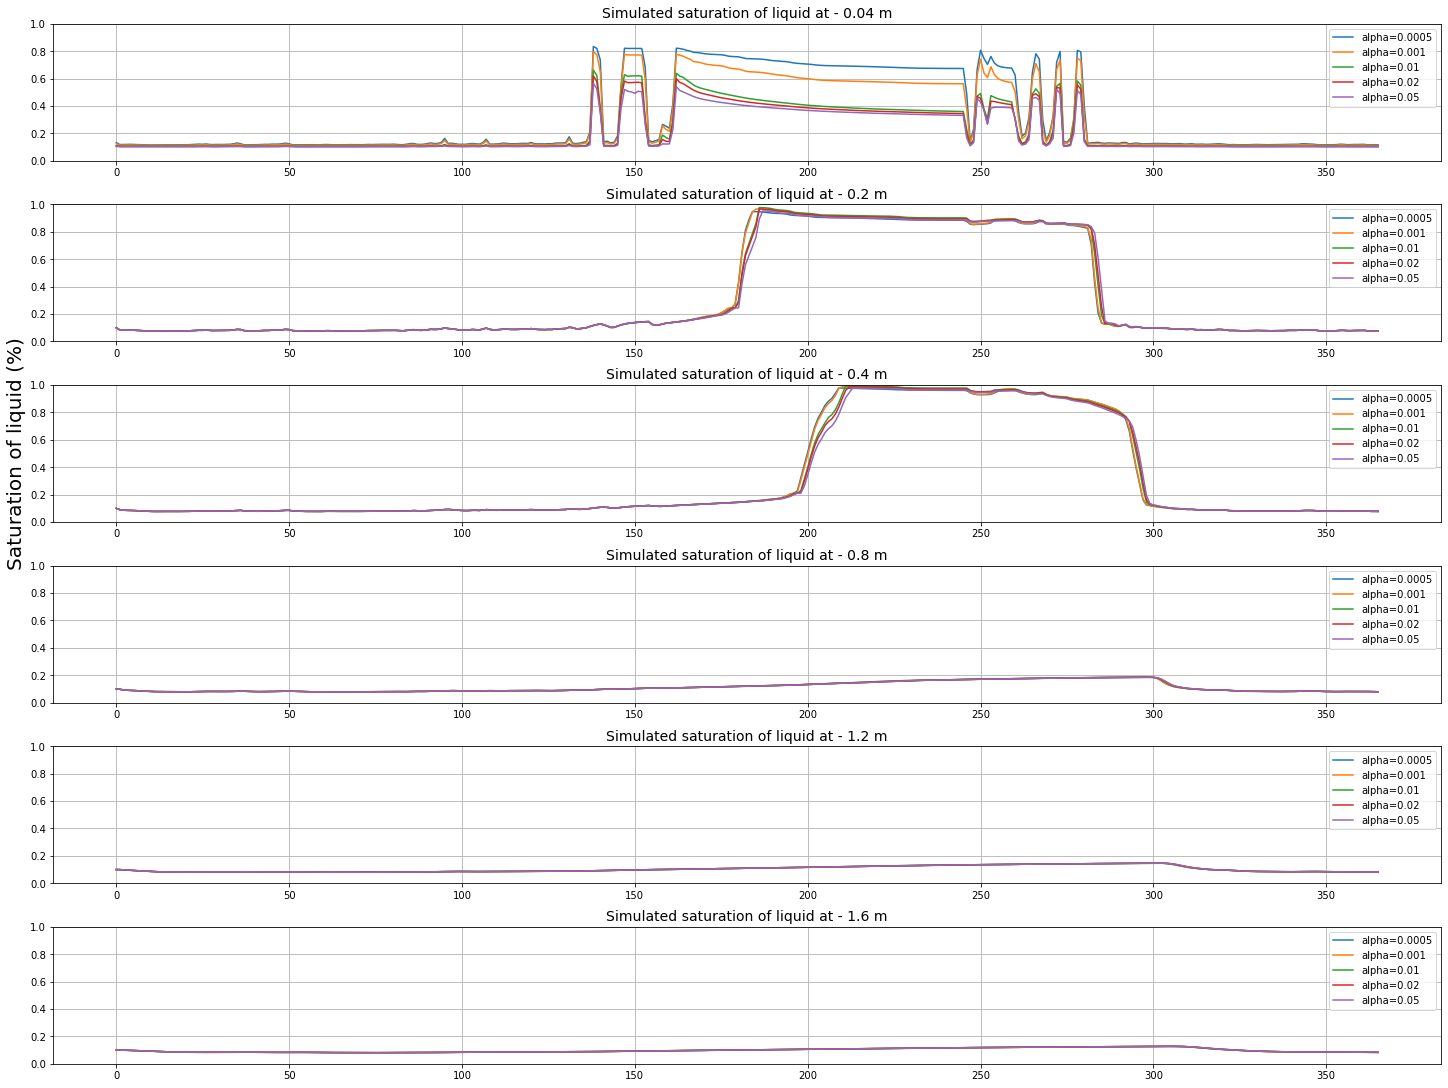

In [16]:
### Plotting the subsurface moisture for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting subsurface moisture at different depths')

P_alpha_values = [0.0005, 0.001, 0.01, 0.02, 0.05]

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for j, depth in enumerate(depths):
    for i, values in enumerate(P_alpha_values):
        locals()['f2_ax'+str(j+1)].plot(locals()[f"df_Palpha{i+1}"][f'point -{depth} saturation liquid'], label=f'alpha={values}')
        locals()['f2_ax'+str(j+1)]
        locals()['f2_ax'+str(j+1)].set_title(f'Simulated saturation of liquid at - {depth} m', fontsize=14)
        #f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].legend()
        locals()['f2_ax'+str(j+1)].set_ylim(0,1.0)
    

f2_ax3.set_ylabel('Saturation of liquid (%)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

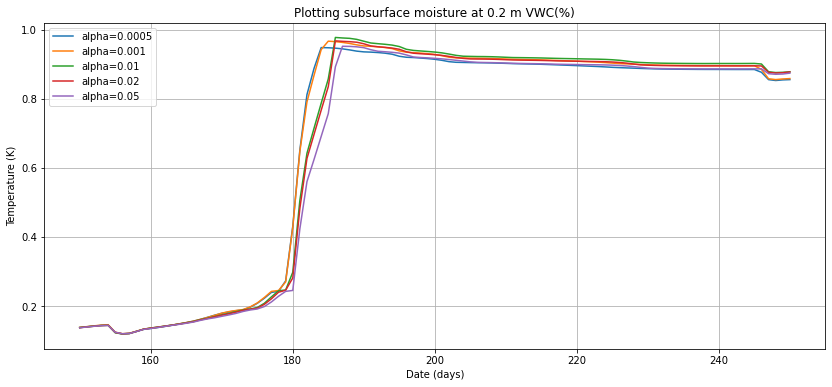

In [17]:
### Plotting the soil temperature at 0.2 m [K]

plt.figure(figsize=(14,6))
plt.title('Plotting subsurface moisture at 0.2 m VWC(%)')

P_alpha_values = [0.0005, 0.001, 0.01, 0.02, 0.05]



for i, values in enumerate(P_alpha_values):
    plt.plot(locals()[f"df_Palpha{i+1}"]['point -0.2 saturation liquid'][150:250], label=f'alpha={values}')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

#### Comments:
- On first sight, the influence of moisture is higher only at 0.04 m and it's infleunce reduces with depth.
- At 0.04 m, the variability of the moisture is greater for lower alpha values. As depth increases, they are more or less similar.
- What would happen if we have precipitation as input at the top?
- Compare the results with actual measurements!

### 7. Comparing the simulation results with the measurements
- The measurement data is evaluated in the file 'AWS_final_metdata_2015_20.ipynb' - To get a better overview, view this Jupyter Notebook

In [18]:
filename_measurements

'../Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/AWS_Yakou_ITP_Data_2015-20.xlsx'

In [19]:
df_AWS = pd.read_excel(f'{filename_measurements}',index_col=0,parse_dates=True) 

In [20]:
df_AWS_details = pd.read_excel('../Data/Data_Yakou/Available_data.xlsx', sheet_name='AWS_Yakou_ITP_Data_2019_extract',index_col=0,parse_dates=True)  
df_AWS_details.head()

,Parameter,Product Name & Direction,Variable name,Depth/Height [m],Time steps [mins],Time interval,Units,Comments
Sl.No.,,,,,,,,
1,Wind speed at 10 m (m/s),"010C/020C; 10 m, north",WS_10m,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,m/s,NaN
2,Wind direction at 10 m (°),"010C/020C; 10 m, north",WD_10m,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,°,Why is the data all red?
3,Air temperature at 5 m (°C),"HMP45C; 5 m, north",Ta_5m,5.0,10,01.01.2019 00:00 - 31.12.2019 23:50,°C,NaN
4,Relative humidity at 5 m (%),"HMP45C; 5 m, north",RH_5m,5.0,10,01.01.2019 00:00 - 31.12.2019 23:50,%,Is it relative? Says RH - Hence should be rela...
5,Precipitation at 10 m (mm),rain gauge (TE525M; 10 m),Rain,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,mm,Precipitation measurement at 10 m? Seems odd


In [21]:
# Dropping an unnecessary column:
df_AWS.drop(['Unnamed: 34'], axis=1,inplace=True)

In [22]:
### Renaming the columns - 
data_AWS = df_AWS.copy()
data_AWS.columns = df_AWS_details['Parameter'].values
data_AWS.columns

Index(['Wind speed at 10 m (m/s)', 'Wind direction at 10 m (°)',
       'Air temperature at 5 m (°C)', 'Relative humidity at 5 m (%)',
       'Precipitation at 10 m (mm)', 'Air pressure (hPa)',
       'Infrared temperature (°C)', 'Infrared temperature (°C)', 'PAR_down',
       'PAR_up', 'Incoming shortwave radiation (W/m^2)',
       'Outgoing shortwave radiation (W/m^2)',
       'Incoming longwave radiation (W/m^2)',
       'Outgoing longwave radiation (W/m^2)', 'Net radiation (W/m^2)',
       'Soil heat flux at - 0.06 m (W/m^2) - 1',
       'Soil heat flux at - 0.06 m (W/m^2) - 2',
       'Soil heat flux at - 0.06 m (W/m^2) - 3',
       'Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.00 m (°C)',
       'Soil temperature at - 0.04 m (°C)', 'Soil temperature at - 0.1 

### The data has -6999 values for missing data
- Therefore replacing -6999 with NaN vaues

In [23]:
data_AWS_syn = data_AWS.copy()
data_AWS_syn = data_AWS_syn.replace(-6999,None)

In [24]:
data_AWS_prep = data_AWS_syn.copy()

In [25]:
len(data_AWS_syn.index[np.where(np.isnan(data_AWS_syn))[0]])

40078

In [26]:
len(data_AWS_syn['Wind speed at 10 m (m/s)']), len(data_AWS_syn.columns), len(data_AWS_syn['Wind speed at 10 m (m/s)'])*len(data_AWS_syn.columns)

(278132, 33, 9178356)

### Comments:
- Few NaN values are present (278132/9178356 = 3.03% ). Since the data is available every 10 mins, we have considered to resample the data. 
- Find the number of NaN values in each column to identify where they are occuring and then decide weather to consider the data or not? - Try later

### Resampling the data to daily mean values 
* To observe the data on a seasonal scale

In [27]:
data_AWS_syn = data_AWS_syn.resample('D').mean()

#### Precipitation - Daily summation of the values are determined instead of mean

In [28]:
data_AWS_prep_dailysum = data_AWS_prep['Precipitation at 10 m (mm)'].resample('D').sum()

### Reducing the data to the year 2017

In [29]:
data_AWS_syn_2017 = data_AWS_syn.loc['2017']

# Changing the units of temperature to Kelvin

data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.04 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.2 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.2 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.4 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.4 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.8 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.8 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 1.2 m (K)'] = data_AWS_syn_2017['Soil temperature at - 1.2 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 1.6 m (K)'] = data_AWS_syn_2017['Soil temperature at - 1.6 m (°C)'] + 273.15

In [30]:
# Converting the index of observation dataframe:

df_simulated = df_Palpha1.copy()

# Slicing only 1 year of simulated data
df_simulated_2017 = df_simulated.loc[0:364]

# Changing the index
df_simulated_2017.index = data_AWS_syn_2017.index

df_simulated_2017.head()

,time [s],water content [mol],point -0.01 temperature [K],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],...,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice,time [days],Soil moisture at - 0.04 m (VWC %),Soil moisture at - 0.2 m (VWC %),Soil moisture at - 0.4 m (VWC %),Soil moisture at - 0.8 m (VWC %),Soil moisture at - 1.2 m (VWC %),Soil moisture at - 1.6 m (VWC %)
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.0,1.155954e+06,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,...,0.900467,0.949996,0.949996,0.0,11.264752,8.460275,4.976632,4.976632,4.976631,4.976629
2017-01-02,86400.0,1.155954e+06,260.746485,261.437005,262.980338,265.291160,267.978711,269.731964,270.084476,270.145553,...,0.900497,0.949996,0.949996,1.0,10.104661,7.115251,4.492156,4.850760,4.955326,4.975162
2017-01-03,172800.0,1.155954e+06,260.866868,261.310462,262.335778,264.016031,266.436771,268.878871,269.799136,270.100734,...,0.900789,0.949996,0.949996,2.0,10.097808,6.948358,4.294899,4.650412,4.869485,4.960550
2017-01-04,259200.0,1.155954e+06,262.372350,262.585741,263.123181,264.128077,265.866457,268.181339,269.429374,270.010798,...,0.901358,0.949996,0.949996,3.0,10.172038,6.961680,4.237388,4.524238,4.772364,4.932117
2017-01-05,345600.0,1.155954e+06,263.031030,263.195315,263.597533,264.340187,265.675366,267.703933,269.063857,269.882932,...,0.902128,0.949996,0.949996,4.0,10.212133,6.987545,4.219513,4.451362,4.688805,4.893598


### 8. Finding the RMSE value - yearly average, monthly average, plotting time series RMSE value
1. Finding the yearly average
2. Finding the monthly average
3. Time series RMSE value

In [31]:
### Writing a function to find the RMSE value:
def RMSE_function(sim, measured, time_scale, name_VarDepth):
    """
    The function is written to find the RMSE (Root Mean Square Error) between the measured and simulated value.
    
    Parameters
    ------
    
    Input parameters:
    
    sim : Pandas dataframes series with daily simulated values. 
    
    measured: Pandas dataframes series with daily measured values. 
    
    time_scale : Choose the time scale in which you would like your results.
    
    (a). 'yearly' - The RMSE values are averaged for the entire year
    
    (b). 'monthly' - The RMSE values are averaged for the entire month
    
    (c). 'daily' - The daily RMSE values are the output. 
    
    name_VarDepth : Provide the name of the variable and the depth (Easy to create dataframe with different columns as Variable - Depths)
            
    Output parameters:
    
    rmse_yearly : Single value, Finds the RMSE between the simulated and measured - averages it over the year
    
    rmse_monthly : Pandas dataframe, Finds the RMSE between the simulated and measured - averaged over a month 
    
    
    """
    
    if time_scale == 'yearly':
        rmse_yearly = np.sqrt(((sim - measured) ** 2).mean())
        
        return rmse_yearly
    
    elif time_scale == 'monthly':
        
        # Creating a numpy array with month numericals from 1,1,2,3 ..12
        month = np.arange(1,13,1)
        
        # Creating a dataframe with monthly indexes
        rmse_monthly = pd.DataFrame(index=sim.resample('M').mean().index, data=np.arange(1,13,1),columns=[f'{name_VarDepth}'])

        for i in range(len(month)):

            # Extracting the monthly values from January - December
            sim_month = sim[f'2017-{month[i]}']
            measured_month = measured[f'2017-{month[i]}']

            
            # Finding the RMSE value and storing it in a dataframe
            rmse_monthly.iloc[i,0] = np.sqrt(((sim_month - measured_month)**2).mean())
            
        return rmse_monthly

In [32]:
### Creating a loop to store the yearly and monthly RMSE values for all variables

# Depths - Note the numbering
depths = ['0.04','0.2','0.4','0.8','1.2','1.6']

# Creating a numpy array to store the rmse (yearly) values
rmse_yearly_temp = np.array([])
rmse_yearly_mois = np.array([])

# Creating a dataframe to store the monthly RMSE temperature and moisture
rmse_month_values = pd.DataFrame(index=df_simulated_2017['point -0.04 temperature [K]'].resample('M').mean().index, data=None, columns=None)



for i in range(len(depths)):
    
    # Calculating the yearly RMSE values - Temperature & Moisture
    sim_temp = df_simulated_2017[f'point -{depths[i]} temperature [K]']
    measured_temp = data_AWS_syn_2017[f'Soil temperature at - {depths[i]} m (K)']
    
    sim_mois = df_simulated_2017[f'Soil moisture at - {depths[i]} m (VWC %)']
    measured_mois = data_AWS_syn_2017[f'Soil moisture at - {depths[i]} m (%)']
    
    value_temp = RMSE_function(sim_temp, measured_temp, time_scale='yearly', name_VarDepth='Temp-1.6')
    rmse_yearly_temp = np.append(rmse_yearly_temp, value_temp)
    
    value_mois = RMSE_function(sim_mois, measured_mois, time_scale='yearly', name_VarDepth='Temp-1.6')
    rmse_yearly_mois = np.append(rmse_yearly_mois, value_mois)
    
    # Calculating the monthly RMSE values
    name_TempDepth = f'Temp-{depths[i]}'
    name_MoisDepth = f'Mois-{depths[i]}'
    
    rmse_month_values[f'{name_TempDepth}'] = RMSE_function(sim_temp, measured_temp, time_scale='monthly', name_VarDepth='{name_TempDepth}')
    rmse_month_values[f'{name_MoisDepth}'] = RMSE_function(sim_mois, measured_mois, time_scale='monthly', name_VarDepth='{name_MoisDepth}')

### Finding the yearly RMSE value for the individual parameters:
1. Find the RMSE value for the simulated and measured results. 
2. For one particular parameter - You will have 30 RMSE values {5 parameter values at 6 depths} - We can plot 'Alpha Vs RMSE' at the six depths in one plot. 
3. Keeping Step 2 in mind: Similarly we can calculate it for the three parameters: alpha, n, wr - We can plot this in three subfigures.
4. We also have three materials which can be plotted in three figures.

In [33]:
# Test
## Step 1 - Find the RMSE value for the simulated and measured results.

# Simulated results: (Excluding the initial value at T = 0)
sim = df_Palpha5['point -1.6 temperature [K]'][1:].values

# Measurements
measured = data_AWS_syn_2017['Soil temperature at - 1.6 m (K)'].values

RMSE_test = np.sqrt(((sim - measured) ** 2).mean())

RMSE_test

2.414808069855811

### IMP!!!

In [35]:
# We can store the RMSE values in a pandas dataframe with the index = depth and columns = alpha
depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]
P_alpha = [0.0005, 0.001, 0.01, 0.02, 0.05]
RMSE_Palpha_temp = pd.DataFrame(index=depths, columns=P_alpha)
RMSE_Palpha_mois = pd.DataFrame(index=depths, columns=P_alpha)
RMSE_Palpha_temp

,0.0005,0.0010,0.0100,0.0200,0.0500
0.04,NaN,NaN,NaN,NaN,NaN
0.20,NaN,NaN,NaN,NaN,NaN
0.40,NaN,NaN,NaN,NaN,NaN
0.80,NaN,NaN,NaN,NaN,NaN
1.20,NaN,NaN,NaN,NaN,NaN
1.60,NaN,NaN,NaN,NaN,NaN


In [36]:
# We can store the RMSE values in a pandas dataframe with the index = depth and columns = parameter
depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

# Storing the alpha, n, and wr values for peat
P_alpha = [0.0005, 0.001, 0.01, 0.02, 0.05]
P_n = [1.05, 1.2, 1.4, 1.6, 2]
P_wr = [0.05, 0.1, 0.12, 0.15, 0.2]

# Storing the alpha, n, and wr values for mineral
M_alpha = [2e-05, 2e-04, 2e-03, 0.007, 0.01]
M_n = [1.05, 1.2, 1.4, 1.6, 2]
M_wr = [0.05, 0.1, 0.12, 0.15, 0.2]

# Storing the alpha, n, and wr values for bedrock
B_alpha = [0.001, 0.05, 0.1, 0.12, 0.13]
B_n = [1.05, 1.5, 2, 2.5, 3]
B_wr = [0.01, 0.05, 0.1, 0.15, 0.2]

materials = ['P', 'M', 'B']
VGc_parameters = ['alpha','n','wr']


# Creating the pandas dataframe dynamically for the three VGc parameters and the three materials
for a, material in enumerate(materials):
    for b, param in enumerate(VGc_parameters):
        locals()['RMSE_'+f'{material}{param}'+'_temp'] = pd.DataFrame(index=depths, columns=locals()[f'{material}_{param}'])
        locals()['RMSE_'+f'{material}{param}'+'_mois'] = pd.DataFrame(index=depths, columns=locals()[f'{material}_{param}'])
        
    

#RMSE_Palpha_temp = pd.DataFrame(index=depths, columns=Peat_alpha)
#RMSE_Palpha_mois = pd.DataFrame(index=depths, columns=Peat_alpha)
#RMSE_Palpha_temp

In [37]:
# Storing the RMSE_values interatively
for a, material in enumerate(materials):
    for b, param in enumerate(VGc_parameters):
        for j, depth in enumerate(depths):
            for k in range(len(locals()[f'{material}_{param}'])):
                
                # Simulated value
                sim_temp = locals()[f'df_{material}{param}'+str(k+1)][f'point -{depth} temperature [K]'][1:].values
                sim_mois = locals()[f'df_{material}{param}'+str(k+1)][f'Soil moisture at - {depth} m (VWC %)'][1:].values
                # Measured value
                measured_temp = data_AWS_syn_2017[f'Soil temperature at - {depth} m (K)'].values
                measured_mois = data_AWS_syn_2017[f'Soil moisture at - {depth} m (%)'].values
        
                # Determining the RMSE value
                locals()['RMSE_'+f'{material}{param}'+'_temp'].iloc[j,k] = np.sqrt(((sim_temp - measured_temp) ** 2).mean())
                locals()['RMSE_'+f'{material}{param}'+'_mois'].iloc[j,k] = np.sqrt(((sim_mois - measured_mois) ** 2).mean())
                
                # Changing the datatype  to float64
                locals()['RMSE_'+f'{material}{param}'+'_temp'].astype('float64')
                locals()['RMSE_'+f'{material}{param}'+'_mois'].astype('float64')
                

In [38]:
# Check
measured_mois = data_AWS_syn_2017[f'Soil moisture at - 1.6 m (%)'].values
sim_mois = df_Bn5['Soil moisture at - 1.6 m (VWC %)'][1:].values
np.sqrt(((measured_mois - sim_mois) ** 2).mean())

5.5897248400921695

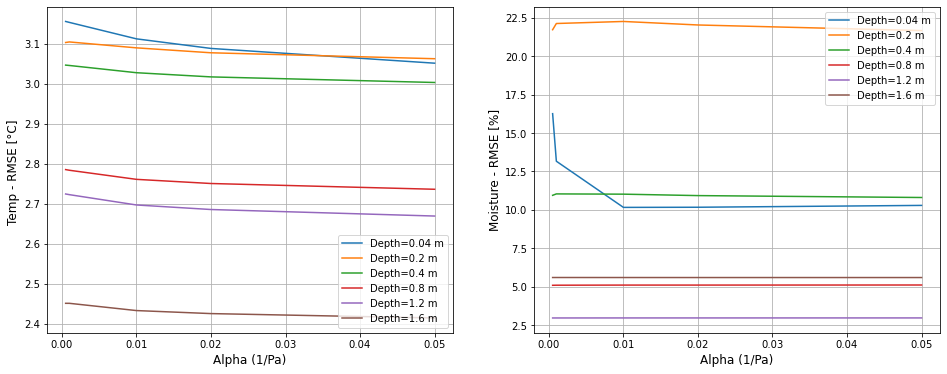

In [40]:

# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)


for i, values in enumerate(RMSE_Palpha_temp.index):
    ax1.plot(RMSE_Palpha_temp.iloc[i,:], label=f'Depth={values} m')
    ax2.plot(RMSE_Palpha_mois.iloc[i,:], label=f'Depth={values} m')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('Alpha (1/Pa)', fontsize=12)
ax1.set_ylabel('Temp - RMSE [°C] ', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('Alpha (1/Pa)', fontsize=12)
ax2.set_ylabel('Moisture - RMSE [%]', fontsize=12)
ax2.legend()
ax2.grid(True)

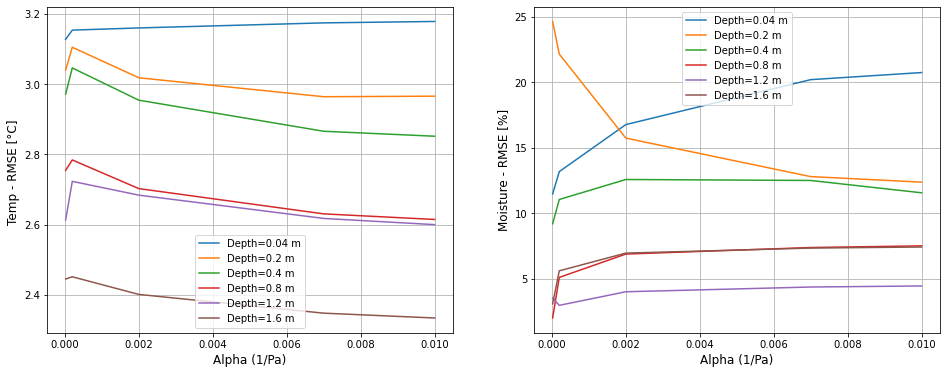

In [41]:
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)


for i, values in enumerate(RMSE_Palpha_temp.index):
    ax1.plot(RMSE_Malpha_temp.iloc[i,:], label=f'Depth={values} m')
    ax2.plot(RMSE_Malpha_mois.iloc[i,:], label=f'Depth={values} m')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('Alpha (1/Pa)', fontsize=12)
ax1.set_ylabel('Temp - RMSE [°C] ', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('Alpha (1/Pa)', fontsize=12)
ax2.set_ylabel('Moisture - RMSE [%]', fontsize=12)
ax2.legend()
ax2.grid(True)

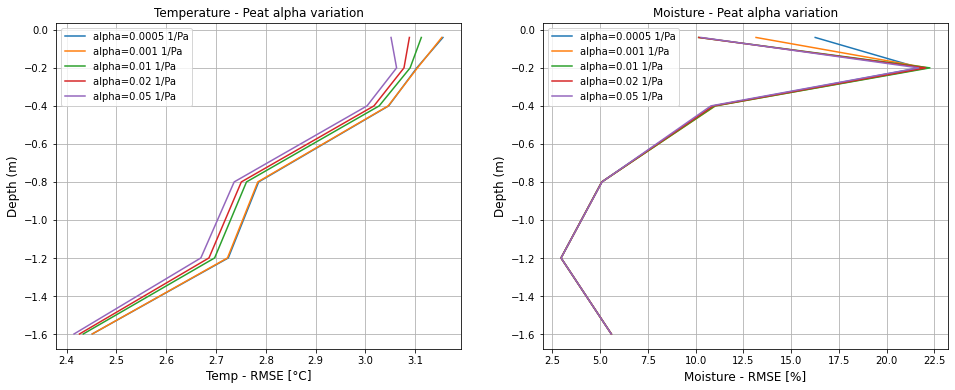

In [42]:
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)
ax1.set_title('Temperature - Peat alpha variation')
ax2.set_title('Moisture - Peat alpha variation')

for i, values in enumerate(RMSE_Palpha_temp.columns):
    ax1.plot(RMSE_Palpha_temp.iloc[:,i].values, - RMSE_Palpha_temp.index, label=f'alpha={values} 1/Pa')
    ax2.plot(RMSE_Palpha_mois.iloc[:,i].values, - RMSE_Palpha_mois.index, label=f'alpha={values} 1/Pa')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('Temp - RMSE [°C]', fontsize=12)
ax1.set_ylabel('Depth (m)', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('Moisture - RMSE [%]', fontsize=12)
ax2.set_ylabel('Depth (m)', fontsize=12)
ax2.legend()
ax2.grid(True)

Comments:
- Temperature:
    * The range of the RMSE value is from 2.4 to 3.2 °C - That is quite good but can get better!
    * The effect of change of alpha is not so prominent - Any other metric that we can consider to quantify the change? 
    * It is observed that as the depth increases, the RMSE value decreases. This is expected as the temperature variations near the surface are dampened as it penetrates to greater depths for homogenous soil.
    * We can also see that as the alpha value increases, the RMSE value reduces.
-

### Calculating senstitivity index:
In order to identify sensitive parameters, we will be estimating the sensitivity index ($\xi$) which is given by:

\begin{equation}
\xi = \frac{\partial f}{\partial P} \frac{P_{org}}{f_{org}} \times 100
\end{equation}

where, f is the function - modelled results based on P from which we can calculate RMSE, $R^{2}$, or NSE (Nash-Sutcliffe efficiency coefficient)), P is the parameter (alpha, n, wr, porosity ..etc.), $P_{org}$ is the initial parameter and $f_{org}$ is the corresponding function at $P_{org}$. Here, we are assuming the difference between the minimum and maximum value.

* Steps to determine $\xi$:
1. Determine the difference between ($\partial f$ = $f_5$ - $f_1$)  and ($\partial P$ = $P_5$ - $P_1$) where f - RMSE value for subsurface temperature, P - alpha
2. Based on the above equation calculate $\xi$
3. Determine the $\xi$ value at all depths
4. Plot the $\xi$ value along all depths
5. Repeat the same procedure for moisture
5. This procedure is done for one parameter - alpha. Similarly, we can repeat steps [1-5] to calculate $\xi$ for the parameter n, wr.
6. Similarly repeat Step 5 for mineral and bedrock
7. Similarly repeat Step 6 for thermal and physical parameters.

### Sensitivity index:

In [43]:
def sensitivity_index(RMSE, si, parameter):
    
    """
    A function to determine the sensitivity index si. It is given by the following equation:
    \\begin{equation}
        si = \\frac{\\partial f}{\\partial P} \\frac{P_{org}}{f_{org}}
    \\end{equation}
    where, f is the function - modelled results based on P from which we can calculate RMSE, R^{2}, or NSE (Nash-Sutcliffe efficiency coefficient)), 
    P is the parameter (alpha, n, wr, porosity ..etc.), P_{org} is the initial parameter and f_{org} is the corresponding function at P_{org}. 
    Here, we are assuming the difference between the minimum and maximum value.
    
    It involves the following main steps:
    1. Determine the difference between (\\partial f = f_5 - f_1)  and (\\partial P = P_5 - P_1) where f - RMSE value for subsurface temperature, P - alpha
    2. Based on the above equation calculate \\xi
    3. Determine the \\xi value at all depths
    
    Note: We will be only considering the first and last alpha value
    
    PARAMETERS:
    -------------
    INPUT:
    
    RMSE : Pandas dataframe,
    
    It has the calculated RMSE for alpha values of [0.0005, 0.001, 0.01, 0.02, 0.05] with depths varying from [0.04, 0.2, 0.4, 0.8, 1.2, 1.6].
    
    si : Pandas dataframe,
    
    It has an empty dataframe where si calculated values are added at various depths [0.04, 0.2, 0.4, 0.8, 1.2, 1.6] and the 
    columns will be [alpha_temp, alpha_mois, n_temp, n_mois, wr_temp, wr_mois]  
    
    parameter : string,
    
    It is the parameter for which you need to determine the sensitivity index. Ex: 'alpha_temp'
    
    OUTPUT: 
    
    si : Pandas dataframe,
    
    It has the si calculated values at various depths [0.04, 0.2, 0.4, 0.8, 1.2, 1.6] and the 
    columns will be [alpha_temp, alpha_mois, n_temp, n_mois, wr_temp, wr_mois]  
    
    """
    
    # Parameter values
    p_1 = RMSE.columns[0]
    p_5 = RMSE.columns[4]
    p_org = RMSE.columns[2]
    
    # Functions - RMSE values - along the depth
    for i, values in enumerate(si.index):
    #print(i)
        f_1 = RMSE.iloc[i,0]
        f_5 = RMSE.iloc[i,4]
        f_org = RMSE.iloc[i,2]
    
        si.loc[values, parameter] = ((f_5 - f_1)/(p_5 - p_1))*(p_org/f_org)*100

    

In [44]:
# Test
#p_1 = RMSE_Bn_temp.columns[0]
#p_5 = RMSE_Bn_temp.columns[4]
#p_org = RMSE_Bn_temp.columns[2]

#f_1 = RMSE_Bn_temp.iloc[0,0]
#f_5 = RMSE_Bn_temp.iloc[0,4]
#f_org = RMSE_Bn_temp.iloc[0,2]

#value = ((f_5 - f_1)/(p_5 - p_1))*(p_org/f_org)*100
#value

In [45]:
# Creating a empty dataframe to calculate si value 

P_si = pd.DataFrame(index=depths, columns=['alpha_temp', 'alpha_mois', 'n_temp', 'n_mois', 'wr_temp', 'wr_mois'])
M_si = pd.DataFrame(index=depths, columns=['alpha_temp', 'alpha_mois', 'n_temp', 'n_mois', 'wr_temp', 'wr_mois'])
B_si = pd.DataFrame(index=depths, columns=['alpha_temp', 'alpha_mois', 'n_temp', 'n_mois', 'wr_temp', 'wr_mois'])

B_si

,alpha_temp,alpha_mois,n_temp,n_mois,wr_temp,wr_mois
0.04,NaN,NaN,NaN,NaN,NaN,NaN
0.20,NaN,NaN,NaN,NaN,NaN,NaN
0.40,NaN,NaN,NaN,NaN,NaN,NaN
0.80,NaN,NaN,NaN,NaN,NaN,NaN
1.20,NaN,NaN,NaN,NaN,NaN,NaN
1.60,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
materials

['P', 'M', 'B']

In [47]:
VGc_parameters

['alpha', 'n', 'wr']

In [48]:
for a, material in enumerate(materials):
    for b, param in enumerate(VGc_parameters):     
        sensitivity_index(locals()['RMSE_'+f'{material}{param}'+'_temp'], locals()[f'{material}_si'], f'{param}_temp')
        sensitivity_index(locals()['RMSE_'+f'{material}{param}'+'_mois'], locals()[f'{material}_si'], f'{param}_mois')

In [49]:
B_si

,alpha_temp,alpha_mois,n_temp,n_mois,wr_temp,wr_mois
0.04,0.00242,-0.014932,-0.014082,0.012695,0.003816,0.007266
0.20,0.008473,-0.068139,-0.08312,-0.013889,0.007305,-0.007376
0.40,0.00439,0.00208,-0.173493,0.022146,0.018616,-0.002503
0.80,0.002358,-0.001718,-0.22723,-0.619337,0.02569,0.087053
1.20,0.003778,-0.002497,-0.042846,-0.218298,0.002782,0.037417
1.60,0.006421,-0.003592,0.423242,-0.64618,-0.046199,0.078357


### Plotting the Sensitivity index values:
1. Three Figures will be plotted for alpha, n and wr
2. Each point in the figure represents one S.I value for one depth and one material
3. We will be having three lines for each material - Peat, Mineral and Bedrock
4. Following steps [1-3] for moisture

(-4.0, 35.0)

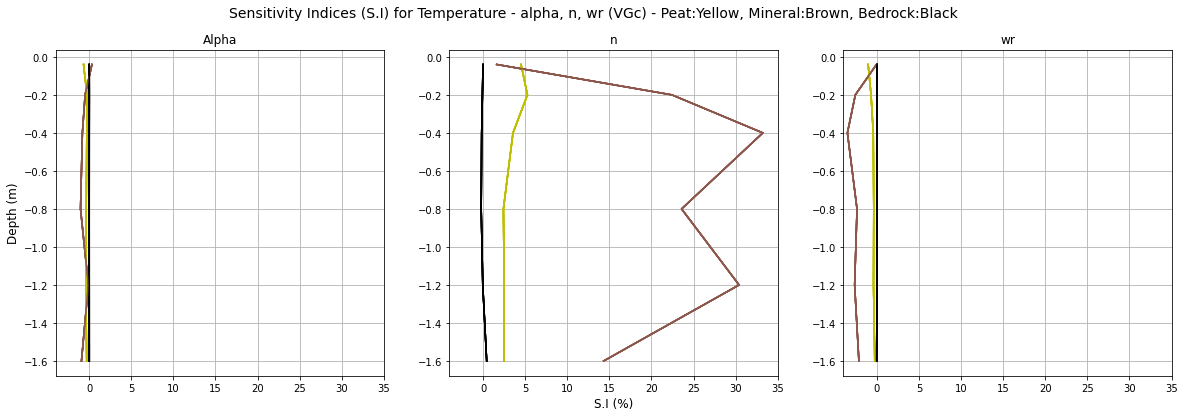

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(20,6)
fig.suptitle('Sensitivity Indices (S.I) for Temperature - alpha, n, wr (VGc) - Peat:Yellow, Mineral:Brown, Bedrock:Black ', fontsize=14)
ax1.set_title('Alpha')
ax2.set_title('n')
ax3.set_title('wr')


for i, depths in enumerate(P_si.index):
    ax1.plot(P_si['alpha_temp'].values, -P_si['alpha_temp'].index, 'y', label='Peat')
    ax2.plot(P_si['n_temp'].values, -P_si['alpha_temp'].index,'y', label='Peat')
    ax3.plot(P_si['wr_temp'].values, -P_si['alpha_temp'].index,'y', label='Peat')
 
    ax1.plot(M_si['alpha_temp'].values, -M_si['alpha_temp'].index, 'tab:brown', label='Mineral')
    ax2.plot(M_si['n_temp'].values, -M_si['alpha_temp'].index,'tab:brown', label='Mineral')
    ax3.plot(M_si['wr_temp'].values, -M_si['alpha_temp'].index,'tab:brown', label='Mineral')
    
    ax1.plot(B_si['alpha_temp'].values, -B_si['alpha_temp'].index, 'k', label='Bedrock')
    ax2.plot(B_si['n_temp'].values, -B_si['alpha_temp'].index,'k', label='Bedrock')
    ax3.plot(B_si['wr_temp'].values, -B_si['alpha_temp'].index,'k', label='Bedrock')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax2.set_xlabel('S.I (%)', fontsize=12)
ax1.set_ylabel('Depth (m)', fontsize=12)
#ax1.legend()
ax1.grid(True)
#ax2.legend()
ax2.grid(True)
#ax3.legend()
ax3.grid(True)
ax1.set_xlim(-4,35)
ax2.set_xlim(-4,35)
ax3.set_xlim(-4,35)

- Comments:
- Parameters:
    * Alpha : The sensitivity of alpha for all three materials appear to be low compared to n and wr. Their variation is from [-1.0 to 0.2]. The sensitivity to mineral layer parameters is greater [makes sense, since most of the sensors are at this depth]. Bedrock appears to have very less sensitivity. With depth, it cannot be said for certain that the sensitivity changes [Comparison also does not make sense]. 
    * n : The n value is more sensitive compared to alpha and wr. Especially the mineral layer which shows greater variations. Bedrock again very less influence. It cannot be said for certain if the variations increases or decreases with depth. 
    * wr : Some senstivity to wr is observed. The wr variation with respect to mineral layer appears to be the greatest (as usual). As depth increases the sensitivity seems to increase. 
    **Sensitivity variations - n > wr > alpha**
- Material:
    **Sensitivity variations - Mineral > Peat > Bedrock**
- Depth:
    Cannot be said for certain!
    

(-1250.0, 100.0)

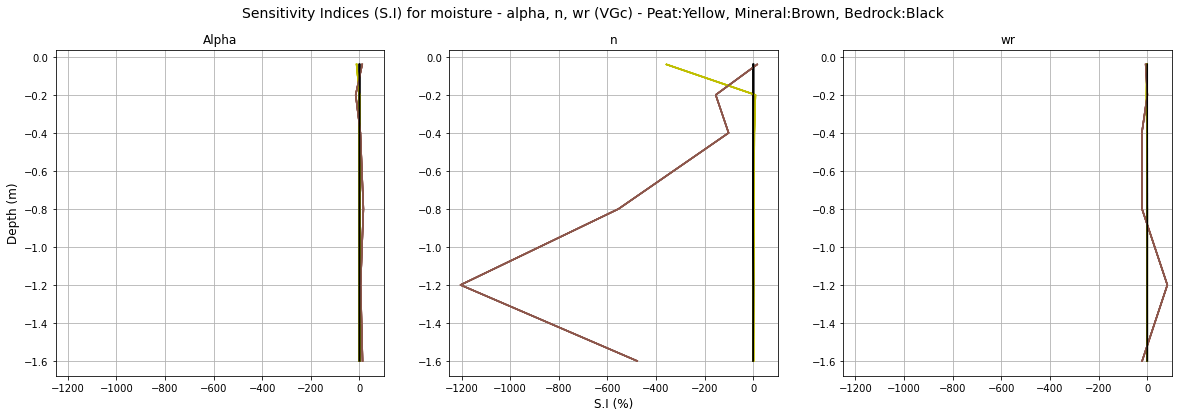

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(20,6)
fig.suptitle('Sensitivity Indices (S.I) for moisture - alpha, n, wr (VGc) - Peat:Yellow, Mineral:Brown, Bedrock:Black ', fontsize=14)
ax1.set_title('Alpha')
ax2.set_title('n')
ax3.set_title('wr')


for i, depths in enumerate(P_si.index):
    ax1.plot(P_si['alpha_mois'].values, -P_si['alpha_mois'].index, 'y', label='Peat')
    ax2.plot(P_si['n_mois'].values, -P_si['alpha_mois'].index,'y', label='Peat')
    ax3.plot(P_si['wr_mois'].values, -P_si['alpha_mois'].index,'y', label='Peat')
 
    ax1.plot(M_si['alpha_mois'].values, -M_si['alpha_mois'].index, 'tab:brown', label='Mineral')
    ax2.plot(M_si['n_mois'].values, -M_si['alpha_mois'].index,'tab:brown', label='Mineral')
    ax3.plot(M_si['wr_mois'].values, -M_si['alpha_mois'].index,'tab:brown', label='Mineral')
    
    ax1.plot(B_si['alpha_mois'].values, -B_si['alpha_mois'].index, 'k', label='Bedrock')
    ax2.plot(B_si['n_mois'].values, -B_si['alpha_mois'].index,'k', label='Bedrock')
    ax3.plot(B_si['wr_mois'].values, -B_si['alpha_mois'].index,'k', label='Bedrock')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax2.set_xlabel('S.I (%)', fontsize=12)
ax1.set_ylabel('Depth (m)', fontsize=12)
#ax1.legend()
ax1.grid(True)
#ax2.legend()
ax2.grid(True)
#ax3.legend()
ax3.grid(True)
ax1.set_xlim(-1250,100)
ax2.set_xlim(-1250,100)
ax3.set_xlim(-1250,100)

- Comments:
    * In general, subsurface moisture appears to be more sensitive than subusurface temperature.
- Parameters:
    * Alpha : The alpha variation seems to be significant for only the mineral layer. Peat and Bedrock appear to have very less significance.  For the values in the mineral layer [From 0.4 m onwards], the alpha value variation seems to be positive.    
    * n : The n value is more sensitive compared to alpha and wr. Here, the n value for the mineral layer seems to be very sensitive.  
    * wr : Some senstivity to wr is observed. The wr variation with respect to mineral layer appears to be the greatest (as usual). As depth increases the sensitivity seems to increase. Only until 1.6 m depth. 
    **Sensitivity variations - n > wr > alpha**
- Material:
    **Sensitivity variations - Mineral > Peat > Bedrock**
- Depth:
    Cannot be said for certain!

### Storing the sensitivity index values as a csv file for comparsion

In [53]:
os.getcwd()

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Hyd_VGc'

In [54]:
P_si.to_csv('Si_Hyd_peat.csv')

In [55]:
M_si.to_csv('Si_Hyd_mineral.csv')

In [56]:
B_si.to_csv('Si_Hyd_bedrock.csv')